# IMT 573 - Lab 5 - Data Analysis

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

Name: Pratiibh Bassi

Collaborators: 

In this module, we have focused on exploring data. Visualization is a great way to do this.

In [an article](https://fivethirtyeight.com/features/women-in-comic-books/) published on fivethirtyeight.com, the authors discuss gender representation in comic books. The data also contains a host of other information about comic book superheros and villans. We will use this dataset in this lab.

The data is split across the two major comic book publishers in the US - DC and Marvel. The urls for each are below. Use these to import the data for each of the publishers into separate dataframes and then combine the two into a larger dataframe.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url_dc = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv"
url_marvel = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv"

In [4]:
dc_data = pd.read_csv(url_dc)
marvel_data = pd.read_csv(url_marvel)

In [11]:
marvel_data = marvel_data.rename(columns={'Year':'YEAR'})

marvel_data.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR'],
      dtype='object')

In [13]:
data_all = pd.concat([dc_data, marvel_data])

### Problem 1: Inspection

First, inspect the datasets to help you get a sense of what is contained in the data. You can find an overview of the data [here](https://github.com/fivethirtyeight/data/tree/master/comic-characters). What do you notice? Where may there be some issues with the data?

In [16]:
data_all

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [18]:
data_all.describe()

,page_id,APPEARANCES,YEAR
count,23272.000000,21821.000000,22388.000000
mean,254956.821932,19.009303,1986.420046
std,231417.093079,93.814040,18.972698
min,1025.000000,1.000000,1935.000000
25%,31385.750000,1.000000,1976.000000
50%,192263.500000,4.000000,1990.000000
75%,456337.750000,10.000000,2001.000000
max,755278.000000,4043.000000,2013.000000


In [20]:
data_all.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [22]:
data_all.tail()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16375,673702,Yologarch (Earth-616),\/Yologarch_(Earth-616),NaN,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN


In [24]:
data_all.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [26]:
data_all.isna().sum()

page_id                 0
name                    0
urlslug                 0
ID                   5783
ALIGN                3413
EYE                 13395
HAIR                 6538
SEX                   979
GSM                 23118
ALIVE                   6
APPEARANCES          1451
FIRST APPEARANCE      884
YEAR                  884
dtype: int64

I've noticed that there are missing data points spread sporadically throughout the records. which may bring up problems in visualization or evaluation of the data.

### Problem 2: Formulate a question

Next, formulate one data science question of interest that can be answered with this dataset. Be sure to comment on why this question in interesting and what you could learn from finding an answer to it.

One question of interest I have is whether more villians have been introduced in comics relative to superheroes across time?

### Problem 3: Data analysis

Next, practice using your data science skills to answer you question. Follow the outlined steps in your data science process.

#### (a) Try the easy solution first

After filtering any anomolous values, try using descriptive statistics to see if you can get a general sense of the answer to your question.

In [35]:
data_all.ALIGN.value_counts()

ALIGN
Bad Characters        9615
Good Characters       7468
Neutral Characters    2773
Reformed Criminals       3
Name: count, dtype: int64

In [37]:
filtered = data_all[data_all.ALIGN.isin(['Good Characters', 'Bad Characters'])].reset_index(drop = True).copy()

In [39]:
filtered.groupby(['ALIGN'])['YEAR'].describe()

,count,mean,std,min,25%,50%,75%,max
ALIGN,,,,,,,,
Bad Characters,9329.0,1984.666524,20.030390,1939.0,1974.0,1990.0,1999.0,2013.0
Good Characters,7162.0,1986.622033,19.249092,1936.0,1976.0,1990.0,2002.0,2013.0


So we can see that there are much more bad chraracters introduced compared to superheroes introduced, especially with respect to time, as we can see that villains have been introduced usually earlier.

#### (b) Check distributions

Look at distribution(s) of your data to determine if there are any patterns that are evident with respect to your question of interest.

C:\Users\Pratiibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pratiibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


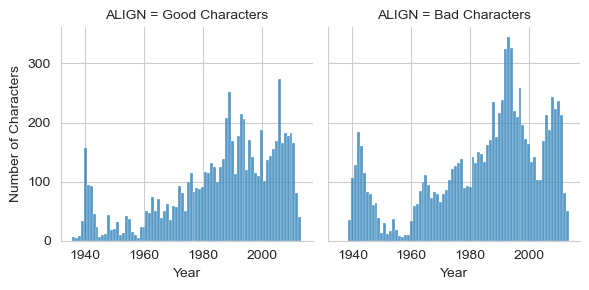

In [47]:
sns.set_style("whitegrid")

graph = sns.FacetGrid(filtered, col = "ALIGN", col_wrap = 2, sharey = True, sharex = True)

graph.map_dataframe(sns.histplot, x = "YEAR", discrete = True).set(xlabel = 'Year', ylabel = 'Number of Characters')

The number of villians has three distinct peaks, one in the 1940s, one in the 1990s, and one in the 2010s.  The number of heroes has a similar peak during 1940s, but smaller peaks (meaning more gradual increase compared to villains less gradual increase) when compared to 1990s and 2010s villains peaks.

#### (c) What's next?

Considering what you've learned during this module, what could be additional steps to take to answer your question? Are there any potential issues with these steps? (In this case, it is perfectly acceptable to note issues without providing potential solutions).

This could be taken a step further by comparing the exact years in which these peaks differentiate in order to get a distinct comparison of how many more or less heroes/villains were introduced during each time period.  We could hone in on 1940s, and especially the 1990s and 2010s and examine the exact difference to see how many more villians were introduced compared to heroes.  I think it would also be interesting to see how long these villains last in comic book series (would be hard to get this data but perhaps could see how often a hero/villian is shown in comics over time), and that way we could see the amount of truly relevant superheroes and relevant villains and compare how often each is introduced into the comic book world.